#Análisis del Problema

El conjunto de datos contiene información sobre diferentes automóviles. Se pretende predecir el precio de un automóvil con respecto al conjunto de características que posee.

## Descarga de los archivos de datos:
https://drive.google.com/file/d/1OrznZ-ODWHnxOA8jK97xsJb-LjAObE5X/view?usp=sharing



### Autores
* Andrey Marín Chacón
* David González Agüero

#Entendimiento de los datos

El presente conjunto de datos contiene las siguientes características:

* **Car_Name**: Esta columna contiene el modelo del automóvil.
* **Year**: Año en el que se fabricó el automóvil.
* **Selling_Price**: Precio de venta del automóvil.
* **Present_Price**: Precio actual del automóvil.
* **Kms_Driven**: Cantidad de Kilómetros que el automóvil ha recorrido.
* **Fuel_Type**: Tipo de combustible que utiliza el automóvil.
* **Seller_Type**: Indica si el vendedor del automóvil es un vendedor particular(Individual) o un concesionario (Dealer).
* **Transmission**: Especifica el tipo de transmisión del automóvil.
* **Owner**: Indica la cantidad de propietarios anteriores que ha tenido el automóvil.

#Exploración de los datos

## Imports

In [ ]:
import pandas as pd
import numpy as np
import joblib

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##1. Lectura del conjunto de datos

In [ ]:
df = pd.read_csv("sample_data/Auto.csv")

##2. Visualización preliminar de la información

In [ ]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Podemos observar con la descripción estadística que va a ser necesario aplicar escalado o normalización al conjunto de datos, esto debido a que las características tienen escalas muy diferentes. Por ejemplo, **Selling_Price** tiene como valor mínimo 0.1 y valor máximo 35, mientras que **Kms_Driven** tiene como valor mínimo 500 y máximo 500000.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Ejecutando el siguiente comando para corroborar si existen o no valores nulos, nos muestra en el resultado una lista vacia, lo que significa que en este dataset no existen nulos.

In [ ]:
# Comprobación de si existen valores nulos
is_null = df.isna().any()
is_null[is_null]

Series([], dtype: bool)

Tampoco existen valores infinitos. Ya que de manera similar al caso anterior con los nulos, nos retorna una lista vacía.

In [ ]:
# Comprobación de la existencia de valores infinitos
is_inf = df.isin([np.inf, -np.inf]).any()
is_inf[is_inf]

Series([], dtype: bool)

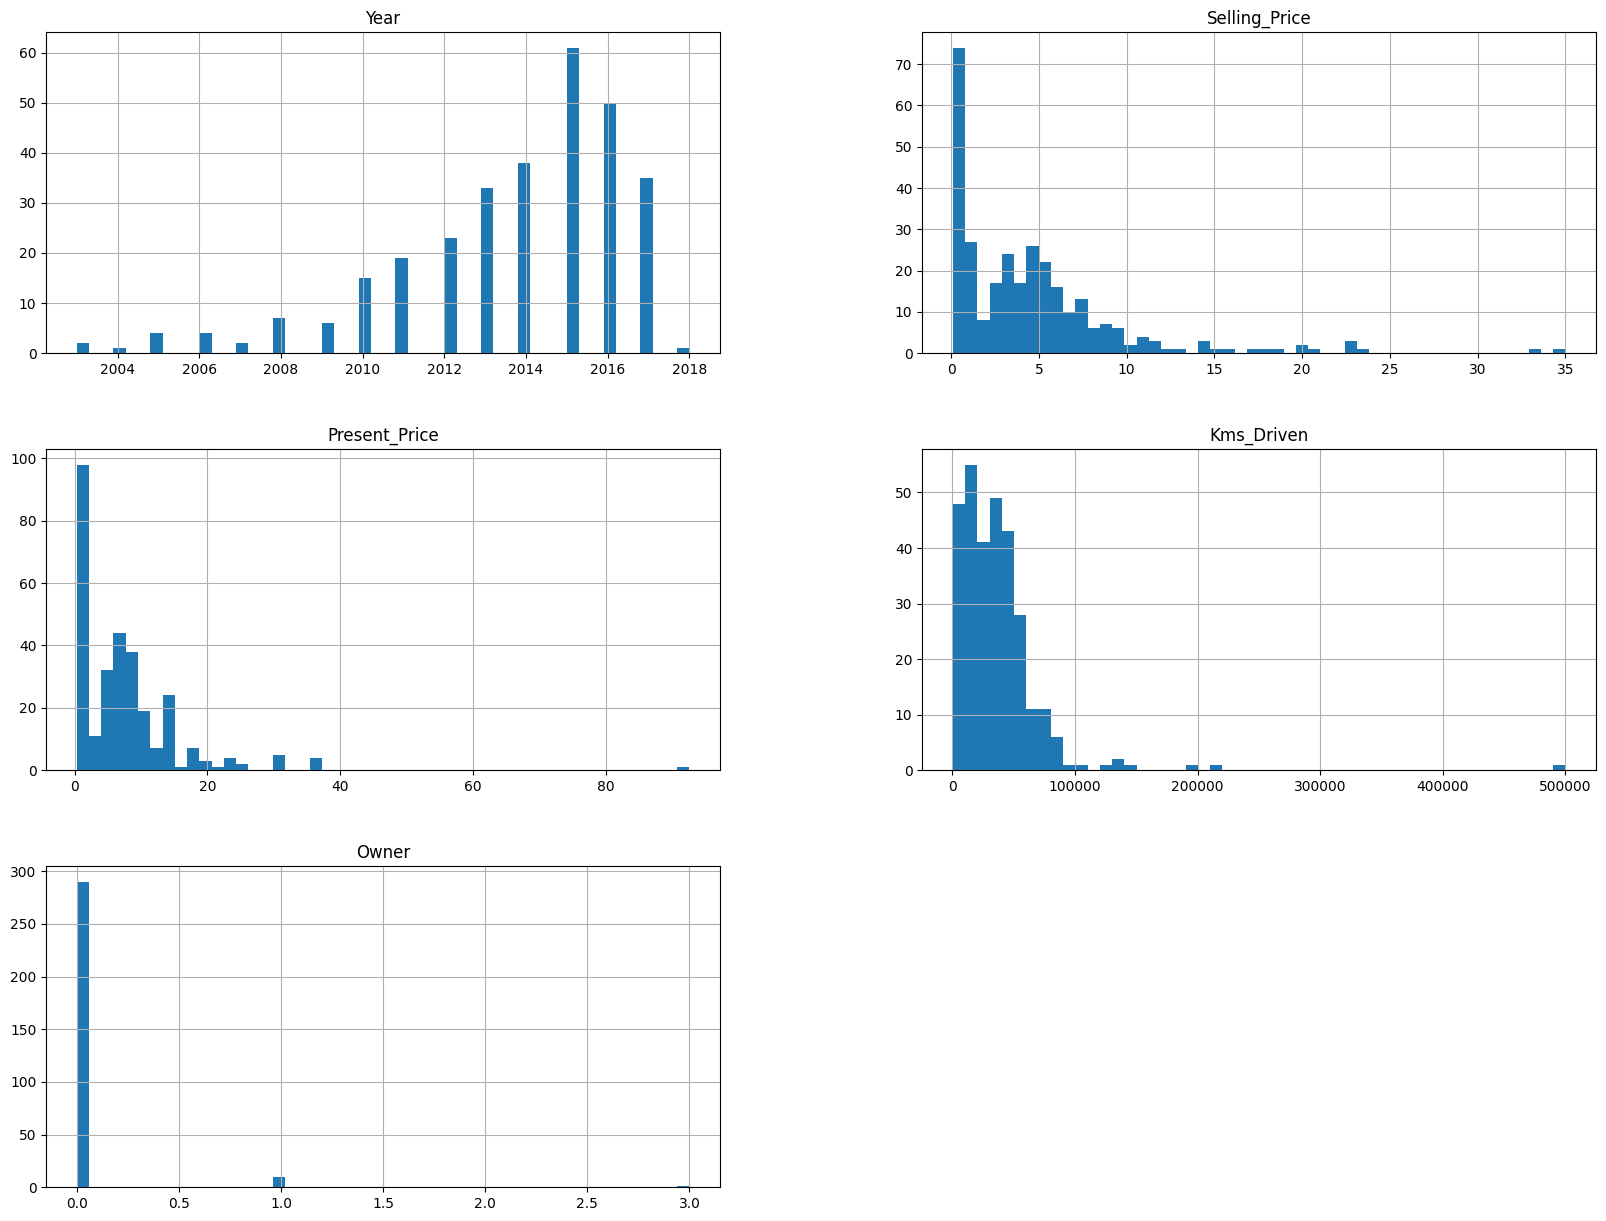

In [ ]:
# Representamos gráficamente la distribución de los atributos
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# Transformamos los valores del atributo Fuel_Type de categoricos a numericos
labelencoder = LabelEncoder()
df["Fuel_Type"] = labelencoder.fit_transform(df["Fuel_Type"])
df

# Transformamos los valores del atributo Transmission de categoricos a numericos
labelencoder = LabelEncoder()
df["Transmission"] = labelencoder.fit_transform(df["Transmission"])
df

# Transformamos los valores del atributo Seller_Type de categoricos a numericos
labelencoder = LabelEncoder()
df["Seller_Type"] = labelencoder.fit_transform(df["Seller_Type"])
df

# Transformamos los valores del atributo Car_Name de categoricos a numericos
labelencoder = LabelEncoder()
df["Car_Name"] = labelencoder.fit_transform(df["Car_Name"])
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,69,2016,9.50,11.60,33988,1,0,1,0
297,66,2015,4.00,5.90,60000,2,0,1,0
298,69,2009,3.35,11.00,87934,2,0,1,0
299,69,2017,11.50,12.50,9000,1,0,1,0


In [ ]:
#Mostramos correlación lineal entre todos los atributos del conjunto de datos
df.corr()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,1.000000,0.017265,0.499198,0.475539,0.064453,-0.371446,-0.829718,-0.059855,-0.081192
Year,0.017265,1.000000,0.236141,-0.047584,-0.524342,-0.053643,-0.039896,0.000394,-0.182104
Selling_Price,0.499198,0.236141,1.000000,0.878983,0.029187,-0.509467,-0.550724,-0.367128,-0.088344
Present_Price,0.475539,-0.047584,0.878983,1.000000,0.203647,-0.440415,-0.512030,-0.348715,0.008057
Kms_Driven,0.064453,-0.524342,0.029187,0.203647,1.000000,-0.166801,-0.101419,-0.162510,0.089216
Fuel_Type,-0.371446,-0.053643,-0.509467,-0.440415,-0.166801,1.000000,0.352415,0.080466,0.055705
Seller_Type,-0.829718,-0.039896,-0.550724,-0.512030,-0.101419,0.352415,1.000000,0.063240,0.124269
Transmission,-0.059855,0.000394,-0.367128,-0.348715,-0.162510,0.080466,0.063240,1.000000,-0.050316
Owner,-0.081192,-0.182104,-0.088344,0.008057,0.089216,0.055705,0.124269,-0.050316,1.000000


En la siguiente instrucción podemos ver que hay una fuerte correlación entre Selling_Price que es la variable de salida con Present_Price:

In [ ]:
# Mostrar la correlación entre los atributos del conjunto de datos
corr_matrix = df.corr()
corr_matrix["Selling_Price"].sort_values(ascending=False)

Selling_Price    1.000000
Present_Price    0.878983
Car_Name         0.499198
Year             0.236141
Kms_Driven       0.029187
Owner           -0.088344
Transmission    -0.367128
Fuel_Type       -0.509467
Seller_Type     -0.550724
Name: Selling_Price, dtype: float64

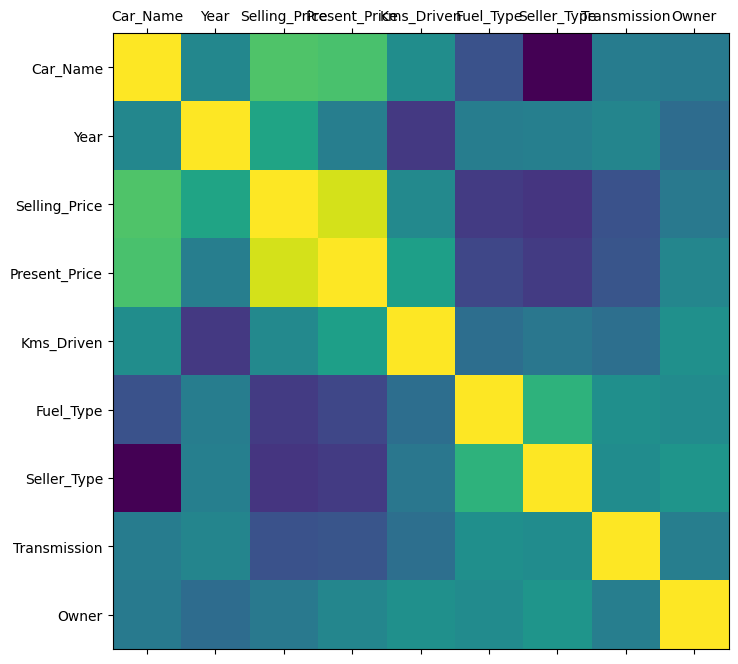

In [ ]:
# Representar gráficamente la matriz de correlación
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

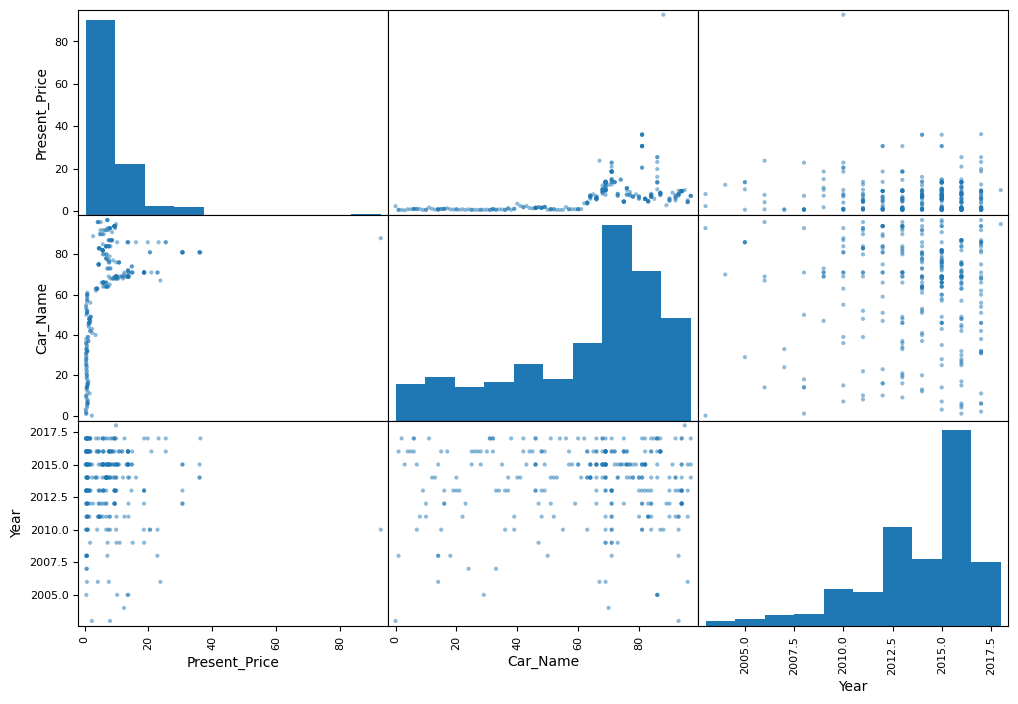

In [ ]:
# Correlaciones representadas gráficamente
atributos = ["Present_Price", "Car_Name", "Year"]

scatter_matrix(df[atributos], figsize=(12, 8))
plt.show()

##3. Division del conjunto de datos

In [ ]:
# División del conjunto de datos 80/20 ya que son poquitos datos
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 184 to 102
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       240 non-null    int64  
 1   Year           240 non-null    int64  
 2   Selling_Price  240 non-null    float64
 3   Present_Price  240 non-null    float64
 4   Kms_Driven     240 non-null    int64  
 5   Fuel_Type      240 non-null    int64  
 6   Seller_Type    240 non-null    int64  
 7   Transmission   240 non-null    int64  
 8   Owner          240 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 18.8 KB


In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 177 to 182
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       61 non-null     int64  
 1   Year           61 non-null     int64  
 2   Selling_Price  61 non-null     float64
 3   Present_Price  61 non-null     float64
 4   Kms_Driven     61 non-null     int64  
 5   Fuel_Type      61 non-null     int64  
 6   Seller_Type    61 non-null     int64  
 7   Transmission   61 non-null     int64  
 8   Owner          61 non-null     int64  
dtypes: float64(2), int64(7)
memory usage: 4.8 KB


In [ ]:
# Separamos las características de entrada de la característica de salida
X_train = train_set.drop("Selling_Price", axis=1)
y_train = train_set["Selling_Price"].copy()

X_test = test_set.drop("Selling_Price", axis=1)
y_test = test_set["Selling_Price"].copy()

##4. Preparación del conjunto de datos

In [ ]:
robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit_transform(X_train['Kms_Driven'].values.reshape(-1,1))

X_train_scaled = pd.DataFrame(X_train_scaled, columns=['Kms_Driven'])
X_train['Kms_Driven'] = X_train_scaled

In [ ]:
X_train

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
184,14,2008,0.750,0.421712,2,1,1,1
132,6,2017,0.950,-0.754333,2,1,1,0
194,18,2008,0.787,0.487343,2,1,1,0
75,78,2015,6.800,-0.813460,2,0,1,0
111,48,2016,1.500,1.196872,2,1,1,0
...,...,...,...,...,...,...,...,...
188,21,2013,0.570,0.206133,2,1,1,0
71,71,2011,12.480,-0.307182,1,0,1,0
106,40,2014,3.450,-0.074368,2,1,1,1
270,69,2011,10.000,NaN,2,0,1,0


Al aplicar escalado en la columna Kms_Driven nos ha generado algunos valores nulos:

In [ ]:
# Comprobación de si existen valores nulos
is_null = X_train.isna().any()
is_null[is_null]

Kms_Driven    True
dtype: bool

In [ ]:
#Rellenamos los valores nulos con la mediana
imputer = SimpleImputer(strategy="median")

X_train_prep = imputer.fit_transform(X_train)

In [ ]:
# Transformamos el resultado a un DataFrame de Pandas
X_train_prep = pd.DataFrame(X_train_prep, columns = X_train.columns, index=y_train.index)

In [ ]:
X_train_prep.head(10)

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
184,14.0,2008.0,0.750,0.421712,2.0,1.0,1.0,1.0
132,6.0,2017.0,0.950,-0.754333,2.0,1.0,1.0,0.0
194,18.0,2008.0,0.787,0.487343,2.0,1.0,1.0,0.0
75,78.0,2015.0,6.800,-0.813460,2.0,0.0,1.0,0.0
111,48.0,2016.0,1.500,1.196872,2.0,1.0,1.0,0.0
59,81.0,2014.0,35.960,0.191706,1.0,0.0,0.0,0.0
93,81.0,2015.0,30.610,-0.804591,1.0,0.0,0.0,0.0
6,68.0,2015.0,8.120,0.250833,2.0,0.0,1.0,0.0
175,22.0,2011.0,0.787,0.635162,2.0,1.0,1.0,0.0
30,90.0,2012.0,5.980,-0.875544,1.0,0.0,1.0,0.0


In [ ]:
# Comprobación de si existen valores nulos
is_null = X_train_prep.isna().any()
is_null[is_null]

Series([], dtype: bool)

#Modelo Regresión Lineal Simple

In [ ]:
# COnstrucción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression()
lin_reg.fit(X_train_prep['Present_Price'].values.reshape(-1, 1), y_train)

LinearRegression()

In [ ]:
#Hacemos las predicciones
y_pred = lin_reg.predict(X_test['Present_Price'].values.reshape(-1, 1))
y_pred

array([ 1.1039252 ,  7.7453588 ,  5.60460507,  1.1039252 , 10.29897217,
        5.3599475 ,  1.56265814,  1.26193322,  1.0886341 ,  5.88494187,
        5.82377747,  1.56265814,  6.9502217 ,  1.07334301,  5.60460507,
        3.30584332,  1.70537506, 10.31426327,  1.0886341 ,  1.74105429,
        1.18547773,  5.60460507,  5.60460507,  3.35681365,  1.31800057,
        4.27427954,  5.8594567 ,  3.7238    ,  1.56265814,  1.57794924,
        1.21453081,  7.9492401 ,  1.29761244,  4.45777271,  6.31309261,
        4.38131722,  8.29583833, 10.29897217,  3.06118575, 10.26329295,
        7.79632912,  7.10822971,  4.07549526,  1.22625399,  5.20193948,
        1.42503826,  7.7453588 , 12.44991997,  3.15802938,  4.27427954,
        5.60460507,  1.56265814, 19.14232389, 13.75476034,  5.60460507,
        7.7453588 ,  3.71870297,  6.72595226,  4.68713918,  5.14587213,
        1.10902223])

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 7.20


In [ ]:
# El mejor puntaje es el que esta cercano a 1
print('Variance Score: %.2f' % r2_score(y_test, y_pred))

Variance Score: 0.69


In [ ]:
lin_reg.score(X_test['Present_Price'].values.reshape(-1, 1), y_test)

0.6873518619001651

#Evaluación

In [ ]:
# Parámetro theta 0
lin_reg.intercept_

0.813394338646654

In [ ]:
# Parámetro theta 1
lin_reg.coef_

array([0.50970327])

In [ ]:
# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
X_min_max = np.array([[X_train_prep["Present_Price"].min()], [X_train_prep["Present_Price"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

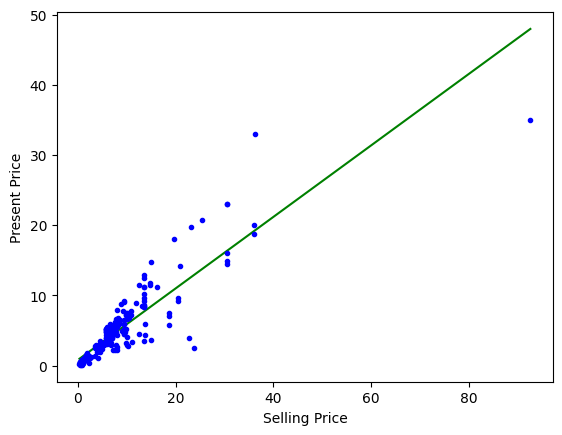

In [ ]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(X_train_prep['Present_Price'], y_train, "b.")
plt.xlabel("Selling Price")
plt.ylabel("Present Price")
plt.show()

#Modelo Regresión Lineal Múltiple


In [ ]:
#Escogeremos las categorias de entrada
X_train_mult = X_train_prep[['Car_Name','Present_Price', 'Year']]
X_test_mult = X_test[['Car_Name','Present_Price', 'Year']]

# las transformamos en arreglo de 2 dimensiones
X_train_mult2D = X_train_mult.values
X_test_mult2D = X_test_mult.values

In [ ]:
# COnstrucción del modelo y ajuste de la función hipótesis
lin_regMult = LinearRegression()
lin_regMult.fit(X_train_mult2D, y_train)

LinearRegression()

In [ ]:
#Hacemos las predicciones
y_pred = lin_regMult.predict(X_test_mult2D)
y_pred

array([ 1.68564762,  8.77393027,  5.40344406, -0.85599394,  9.95676348,
        6.02054342,  1.97304566,  1.51108662,  1.63553813,  6.23026662,
        8.25772044,  1.09790071,  7.11505455,  1.59846613,  5.84101654,
        3.5556142 ,  0.81551187, 11.72178497,  2.25000019,  3.19694856,
        0.5222544 ,  6.71151003,  5.40344406,  2.76495241,  0.69834344,
        3.94490761,  5.64431881,  2.90624267,  2.84819062,  2.46072763,
        0.30259898,  8.09520629, -1.16003336,  2.5305972 ,  7.51789562,
        4.56939442,  8.02692739,  8.20647356,  3.42604278,  8.60967237,
        4.31045054,  2.92693393,  4.27476296,  1.29982336,  6.2751632 ,
        0.80611592,  7.89878532, 10.71628734,  3.28938629,  3.94490761,
        5.84101654,  2.84819062, 19.52855785, 15.3017233 ,  6.7161615 ,
        8.77393027,  4.68699997,  7.79182539,  1.45189084,  6.58796407,
        0.43090758])

In [ ]:
lin_regMult.score(X_test_mult2D, y_test)

0.8326451732942757

In [ ]:
# Salvar el modelo en archivo .pkl
joblib.dump(lin_regMult, "01PrecioAutomovil.pkl")

['01PrecioAutomovil.pkl']

In [ ]:
# Cargar modelo
regLinealCargado = joblib.load("01PrecioAutomovil.pkl")

#Conclusión
Como podemos observar en la gráfica el modelo de regresión lineal simple se adapta en cierta parte  al conjunto de datos de entrenamiento. Solamente utilizando la característica de Present Price, el modelo predice un 69% de la variabilidad de los datos. Por lo que no se recomienda en ambientes donde se necesita una precisión más alta.
Sin embargo haciendo una regresion lineal multiple con las tres caracteristicas escogidas, el modelo incrementó su precisión a un 83%.